In [1]:
import sys
sys.path.append('..')

import numpy as np

from olfactory_navigation import Environment

# Loading Environment

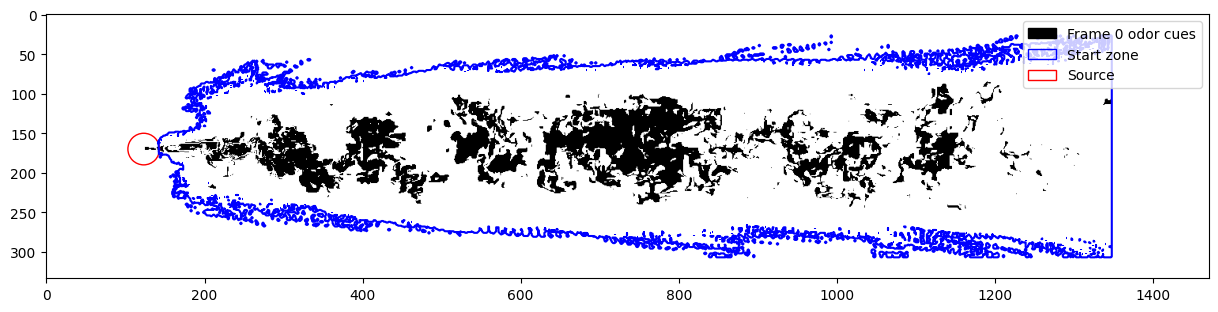

In [2]:
full_env = Environment(data_file="C:\\Users\\arnau\\Desktop\\Master Thesis Files [TO BACKUP]\\Data\\nose_data.npy",
                       data_source_position=[143,0],
                       source_radius=20,
                       margins=[27,123],
                       boundary_condition='wrap_vertical',
                       start_zone='odor_present',
                       odor_present_threshold=3e-6
                       )

full_env.plot()

In [49]:
import numpy as np
from scipy import interpolate

In [50]:
timesteps, height, width = full_env.data.shape
new_height, new_width = 27, 123

In [78]:
full_env.data.shape

(2600, 280, 1225)

In [55]:
ys_new

array([  0.        ,  10.76923077,  21.53846154,  32.30769231,
        43.07692308,  53.84615385,  64.61538462,  75.38461538,
        86.15384615,  96.92307692, 107.69230769, 118.46153846,
       129.23076923, 140.        , 150.76923077, 161.53846154,
       172.30769231, 183.07692308, 193.84615385, 204.61538462,
       215.38461538, 226.15384615, 236.92307692, 247.69230769,
       258.46153846, 269.23076923, 280.        ])

In [60]:
ts = np.arange(timesteps)
ys = np.arange(height)
xs = np.arange(width)

interpolated_data = interpolate.RegularGridInterpolator((ts, ys, xs), full_env.data, method='cubic')

ys_new = np.linspace(0, height-1, num=new_height)
xs_new = np.linspace(0, width-1, num=new_width)

ts1, ys1, xs1 = np.meshgrid(ts, ys_new, xs_new, indexing='ij')
new_data = interpolated_data((ts1,ys1,xs1))

MemoryError: Unable to allocate 45.7 TiB for an array with shape (8634600, 728000) and data type float64

In [61]:
ts = np.arange(timesteps)
ys = np.arange(height)
xs = np.arange(width)

ys_new = np.linspace(0, height-1, num=new_height)
xs_new = np.linspace(0, width-1, num=new_width)

ys1, xs1 = np.meshgrid(ys_new, xs_new, indexing='ij')

new_data = np.zeros((timesteps, new_height, new_width))

for i in range(timesteps):
    interpolated_data = interpolate.RegularGridInterpolator((ys, xs), full_env.data[i], method='linear')

    new_data[i] = interpolated_data((ys1,xs1))

In [64]:
ts = np.arange(timesteps)
ys = np.arange(height)
xs = np.arange(width)

interpolated_data = interpolate.RegularGridInterpolator((ts, ys, xs), full_env.data, method='linear')

ys_new = np.linspace(0, height-1, num=new_height)
xs_new = np.linspace(0, width-1, num=new_width)

ts1, ys1, xs1 = np.meshgrid(ts, ys_new, xs_new, indexing='ij')
new_data = interpolated_data((ts1,ys1,xs1))

In [65]:
ts = np.arange(timesteps)
ys = np.arange(height)
xs = np.arange(width)

ys_new = np.linspace(0, height-1, num=new_height)
xs_new = np.linspace(0, width-1, num=new_width)

ys1, xs1 = np.meshgrid(ys_new, xs_new, indexing='ij')

new_data = np.zeros((timesteps, new_height, new_width))

for i in range(timesteps):
    interpolated_data = interpolate.RegularGridInterpolator((ys, xs), full_env.data[i], method='linear')

    new_data[i] = interpolated_data((ys1,xs1))

In [68]:
import cv2

In [76]:
new_data = np.zeros((timesteps, new_height, new_width))

for i in range(timesteps):
    new_data[i] = cv2.resize(full_env.data[i], dsize=(new_width, new_height), interpolation=cv2.INTER_)

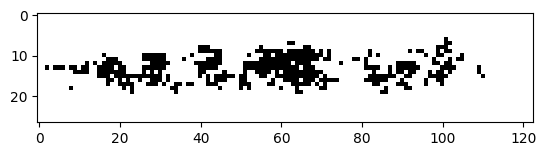

In [77]:
plt.imshow(new_data[0] > 3e-6, cmap='Greys')

In [67]:
np.round(ys_new)

array([  0.,  11.,  21.,  32.,  43.,  54.,  64.,  75.,  86.,  97., 107.,
       118., 129., 140., 150., 161., 172., 182., 193., 204., 215., 225.,
       236., 247., 258., 268., 279.])

In [62]:
new_data.shape

(2600, 27, 123)

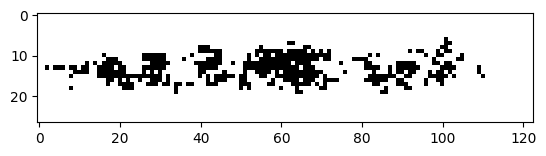

In [71]:
plt.imshow(new_data[0] > 3e-6, cmap='Greys')

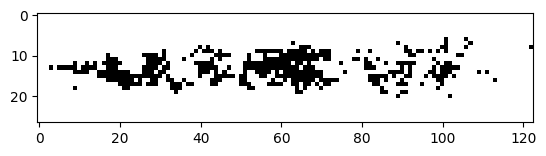

In [59]:
plt.imshow(new_data[0] > 3e-6, cmap='Greys')

In [4]:
import numpy as np
dat = np.load('G:\\My Drive\\Documents\\Universita di Genova\\Pimlb work\\nose_data_27_123.npy')

In [5]:
dat[0,:3,:3]

array([[ 6.96631978e-15,  7.37010007e-16, -6.98059990e-15],
       [-1.91097591e-14, -1.47079928e-14, -8.84571905e-15],
       [ 1.08832791e-14,  8.51323286e-15,  4.38045237e-15]])

In [6]:
np.argwhere(full_env.data < 0)

array([[   0,    0,   19],
       [   0,    0,   20],
       [   0,    0,   21],
       ...,
       [2599,  279, 1219],
       [2599,  279, 1220],
       [2599,  279, 1224]], dtype=int64)

In [16]:
ts = np.arange(len(full_env.data))
ys = np.arange(full_env.height)
xs = np.arange(full_env.width)

In [41]:
from scipy import interpolate

f = interpolate.RegularGridInterpolator((ys,xs), full_env.data[0], method='quintic')

In [ ]:
np.linspace()

In [47]:
ys_new = np.arange(0, full_env.height, 11.5)
xs_new = np.arange(0, full_env.width, 11.5)

xs1, ys1 = np.meshgrid(ys_new, xs_new, indexing='ij')
z = f((xs1,ys1))

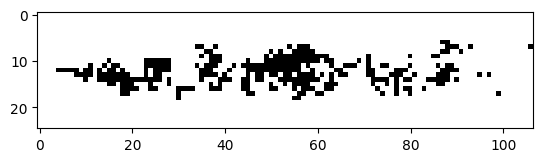

In [48]:
from matplotlib import pyplot as plt
plt.imshow(z > 3e-6, cmap='Greys')

In [44]:
z.shape

(28, 123)